# Assignment 1 (Ames Housing)
## Problem Statement
The problem statement is to apply the tools of Machine Learning to develop a model that learns from a set of training data of sale prices for residential homes in Ames, Iowa. The trained model must correctly and predict the prices of the homes using the explanatory variables describing each aspect of the houses, based on the given test dataset which does not contain the sale prices.

## Import necessary libraries
The pandas, numpy and matplotlib libraries are needed for data visualisation and analysis, while scikit-learn gives us common classification algorithms that is used to develop the machine learning model.

In [1]:
# Data visualisation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
sns.set_style("whitegrid")
#show plots in Jupyter Notebook browser
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load datasets

In [2]:
# Import both train and test datasets
train_dataset = pd.read_csv("./datasets/train.csv")
test_dataset = pd.read_csv("./datasets/test.csv")

## Exploratory Data Analysis

In [3]:
# List train dataset's variables
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are a total of 81 columns, each column name represent an attribute of each house. The target variable is SalePrice, we observe that there are also missing data for some columns which needs to cleaned. The train dataset contains 38 numerical variables and 43 string/categorical variables.

In [4]:
# Display first eight entries in train dataset
train_dataset.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


### SalePrice

Skewness: 1.882876
Kurtosis: 6.536282


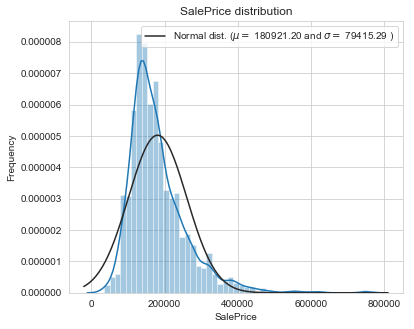

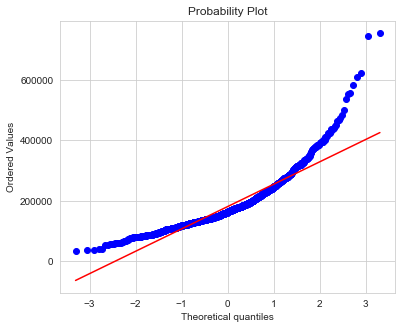

In [5]:
from scipy import stats
from scipy.stats import norm, skew
(mu, sigma) = norm.fit(train_dataset['SalePrice'])

#skewness and kurtosis
print("Skewness: %f" % train_dataset['SalePrice'].skew())
print("Kurtosis: %f" % train_dataset['SalePrice'].kurt())
#histogram
f, ax = plt.subplots(figsize=(6, 5))
sns.distplot(train_dataset['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#Get also the QQ-plot
fig = plt.figure(figsize=(6, 5))
res = stats.probplot(train_dataset['SalePrice'], plot=plt)
plt.show()

From the output above, we observe that the distribution of SalesPrice is positively skewed, with a high skewness of 1.88. Skewness refers to lack of symmetry in data distribution, differentiating extreme values from both tails. We also measure Kurtosis as a method to measure of outliers present in the distribution. The result indicates that the data is heavy-tailed or profusion of outliers (Kurtosis > 3). We can transform this feature to make it more evenly distributed by using log transformation.

Skewness: 0.121347
Kurtosis: 0.809519


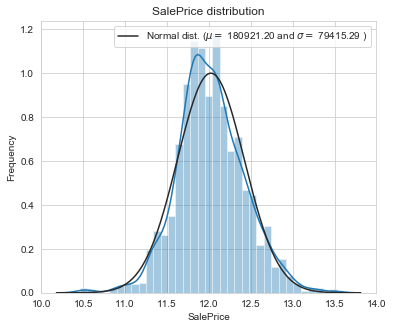

In [6]:
# Applying a log(1+x) transformation to SalePrice
train_dataset["SalePrice"] = np.log1p(train_dataset["SalePrice"])
f, ax = plt.subplots(figsize=(6, 5))
# 1. Plot Sale Price
sns.distplot(train_dataset['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

#skewness and kurtosis
print("Skewness: %f" % train_dataset['SalePrice'].skew())
print("Kurtosis: %f" % train_dataset['SalePrice'].kurt())

After applying log transformation, the SalePrice feature appears to be more distributed and less skewed.

#### SalePrice correlation

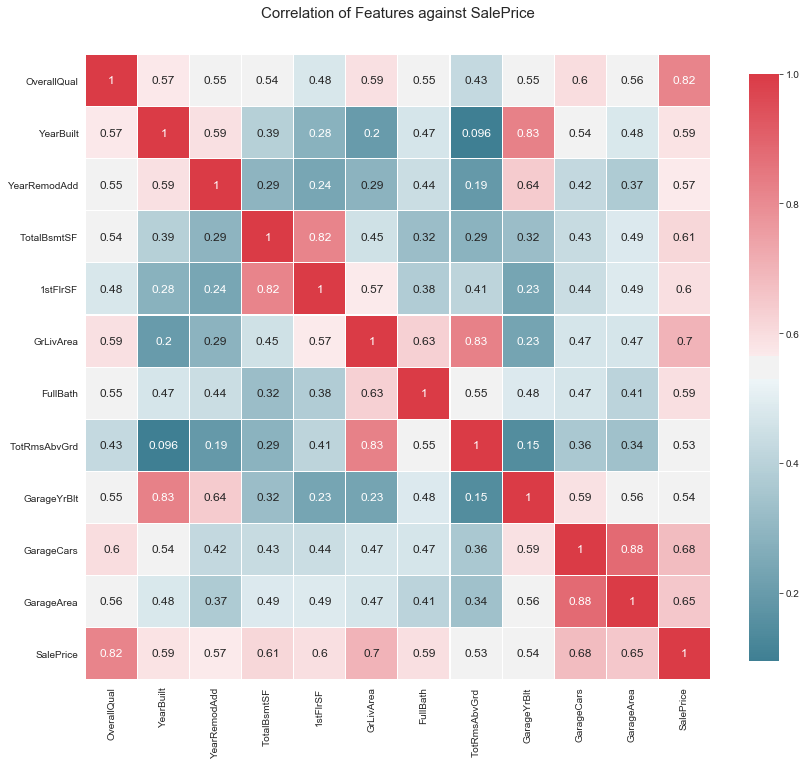

In [7]:
# Display features that have a correlation of 0.5 with SalePrice

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    corrmat = train_dataset.corr()
    top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
    _ = sns.heatmap(
        train_dataset[top_corr_features].corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features against SalePrice', y=1.05, size=15)

correlation_heatmap(train_dataset)

The output above shows the variables that have a correlation of more than 0.5 or -0.5 with SalePrice. A short description of each variable can be found on Kaggle. We will perform EDA on the top eight correalated variables shown below.

1. OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
2. GrLivArea: Above grade (ground) living area square feet
3. GarageCars: Size of garage in car capacity
4. GarageArea: Size of garage in square feet
5. TotalBsmtSF: Total square feet of basement area
6. 1stFlrSF: First Floor square feet
7. FullBath: Full bathrooms above grade
8. YearBuilt: Original construction date


### OverallQual

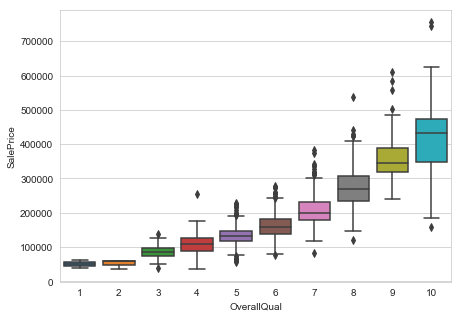

In [4]:
f, ax = plt.subplots(figsize=(7, 5))
sns.boxplot("OverallQual",y="SalePrice",data=train_dataset)

OverallQual has the highest correlation with SalePrice, and the output is as expected as the price of a house increases when the overall material and finish of the house is better.

### GrLivArea

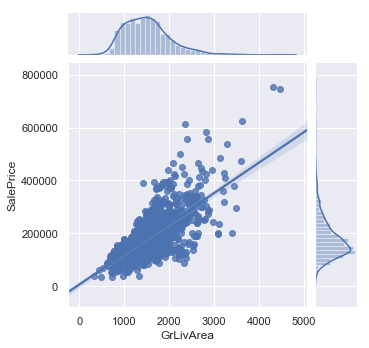

In [16]:
# Plot scatterplot with a regression line for GrLivArea against SalesPrice
sns.jointplot(x=train_dataset.GrLivArea, y=train_dataset.SalePrice, kind='reg',height=5)

There is a strong corrleation between SalePrice and GrLivArea because a larger living area would correspond to a higher sale price. However, it is observed that there are two major outliers at the bottom right of the scatterplot, as the outliers have extremely large living areas but have extremley low sale prices. We can remove the two outliers identified.

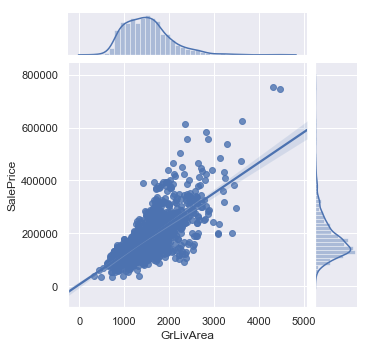

In [17]:
train_dataset = train_dataset.drop(train_dataset[(train_dataset['GrLivArea']>4000)&(train_dataset['SalePrice']<300000)].index)
sns.jointplot(x=train_dataset.GrLivArea, y=train_dataset.SalePrice, kind='reg',height=5)

### GarageCars

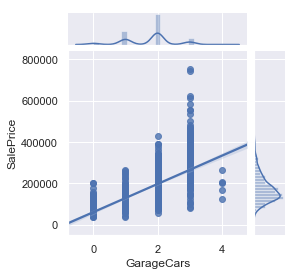

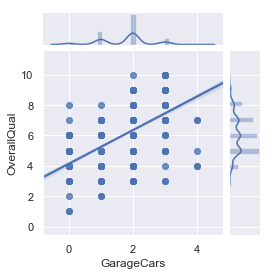

In [15]:
sns.jointplot(x=train_dataset.GarageCars, y=train_dataset.SalePrice, kind='reg',height=4)
sns.jointplot(x=train_dataset.GarageCars, y=train_dataset.OverallQual, kind='reg',height=4)

We can observe that the sale price of a house increases when the size of garage in car capacity increases, which is expected from our assumptions. However, when the size of the garage is 4 cars, the sale price for those houses are low. This may be due to the lower OverallQual for houses that can fit 4 cars in the garage, hence we can ignore the anomalies.

### GarageArea

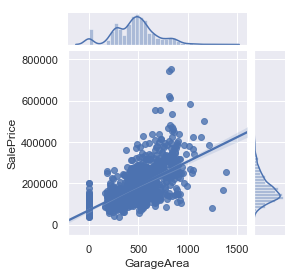

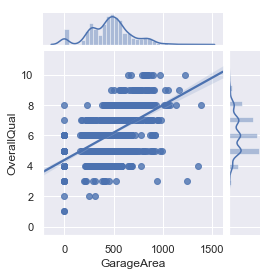

In [18]:
sns.jointplot(x=train_dataset.GarageArea, y=train_dataset.SalePrice, kind='reg',height=4)
sns.jointplot(x=train_dataset.GarageArea, y=train_dataset.OverallQual, kind='reg',height=4)

Similarly with GarageCars, We can observe that the sale price of a house increases when the size of garage in square feet increases, which is expected from our assumptions. However, we observe three anomalies at the bottom right of the scatterplot. This may be due to the lower OverallQual for those houses hence we can ignore the anomalies.

### TotalBsmtSF & 1stFlrSF

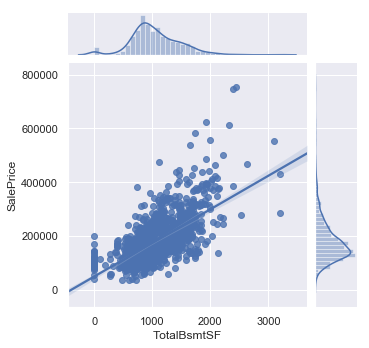

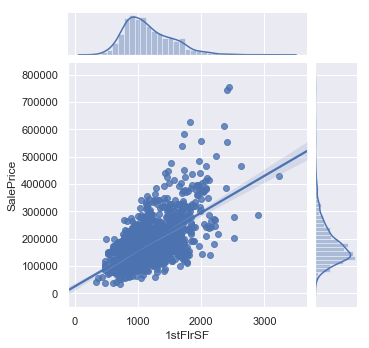

In [20]:
sns.jointplot(x=train_dataset.TotalBsmtSF, y=train_dataset.SalePrice, kind='reg',height=5)
sns.jointplot(x=train_dataset['1stFlrSF'], y=train_dataset.SalePrice, kind='reg',height=5)

We observe that the sale price increases as the size of the basement and first floor increases in terms of square feet.

### FullBath

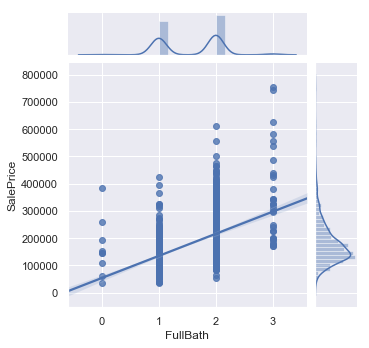

In [21]:
sns.jointplot(x=train_dataset.FullBath, y=train_dataset.SalePrice, kind='reg',height=5)

We observe that the houses with more number of full bathrooms above ground would have a higher sale price.

### YearBuilt

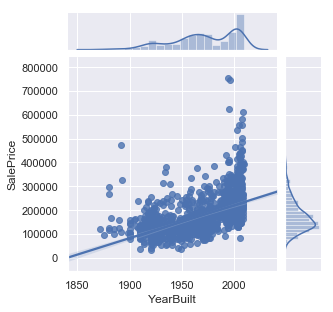

In [33]:
sns.jointplot(x=train_dataset.YearBuilt, y=train_dataset.SalePrice, kind='reg',height=4.5)

From the output, we observe that newer houses tend to have a higher sale price.

## Feature Engineering

### Missing Values

In [39]:
# Display variables with missing data and the percentage of missing data in each variable
total = train_dataset.isnull().sum().sort_values(ascending=False)
ratio = (train_dataset.isnull().sum()/train_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])
missing_data.head(20)

,Total,Ratio
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


From the output above, there are 19 variables with empty values which are subjected to cleaning. The variable with the highest percentage of missing data is PoolQC as only about 1% of data is not empty.